In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('finalwormholeDataset.csv')

In [3]:
df.head()

,duration,protocol,Plength,flag,Mlength,HoP,LifeTime,MsgType,DSN,Sno,...,land,Tmode,Neighbors,Hflow,AvgFlow,Lflow,AvgHopCount,failedConnection,Failed Rate,Label
0,0.000000,AODV,84,0,28,0,2000,Route Reply,0,0,...,0,1,8,6367,1319.25,5,0.24832,2700,59.960027,normal
1,0.000978,ICMP,92,-1,28,-1,-1,-1,-1,0,...,2,0,8,6367,1319.25,5,0.24832,2700,59.960027,attack
2,0.028177,AODV,76,0,20,-1,-1,Route Error,0,1,...,2,1,8,6367,1319.25,5,0.24832,2700,59.960027,normal
3,0.001886,AODV,76,0,20,-1,-1,Route Error,0,1,...,2,1,8,6367,1319.25,5,0.24832,2700,59.960027,normal
4,0.001973,ICMP,92,-1,20,-1,-1,-1,-1,2,...,2,0,8,6367,1319.25,5,0.24832,2700,59.960027,attack


In [4]:
df = df.sample(frac=1)

In [5]:
df.head()

,duration,protocol,Plength,flag,Mlength,HoP,LifeTime,MsgType,DSN,Sno,...,land,Tmode,Neighbors,Hflow,AvgFlow,Lflow,AvgHopCount,failedConnection,Failed Rate,Label
576865,0.001065,AODV,84,0,28,0,2000,Route Reply,2,2,...,0,1,14,7758,1414.500000,1,0.198336,4515,68.357305,normal
322234,0.002085,AODV,76,0,20,-1,-1,Route Error,0,8,...,2,1,10,6184,1734.500000,301,0.216141,3621,57.889688,normal
32114,0.000050,ICMP,92,-1,28,-1,-1,-1,-1,1,...,2,0,13,6398,1832.076923,291,0.214430,4500,62.595632,attack
559538,0.001373,ICMP,92,-1,28,-1,-1,-1,-1,16,...,2,0,14,7758,1414.500000,1,0.198336,4515,68.357305,attack
76123,0.001278,ICMP,92,-1,28,-1,-1,-1,-1,22,...,2,0,12,7260,2035.916667,25,0.189336,3741,56.949307,attack


In [6]:
df.shape

(637862, 21)

In [7]:
df.describe()

,duration,Plength,flag,Mlength,HoP,LifeTime,Sno,Sindex,land,Tmode,Neighbors,Hflow,AvgFlow,Lflow,AvgHopCount,failedConnection,Failed Rate
count,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000
mean,0.014189,89.589435,110.839263,25.770104,-0.766843,404.101061,9.819489,1429.758499,1.631633,0.251398,13.758746,7236.509479,1671.795566,61.917407,0.204938,4342.024985,62.910107
std,0.096779,32.584956,1133.951488,32.609399,0.578324,980.532344,9.727308,1139.028021,0.763185,0.433817,2.826686,645.978748,276.146268,107.105989,0.017860,699.159048,4.434745
min,0.000000,66.000000,-1.000000,10.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,6142.000000,1001.300000,1.000000,0.179579,2700.000000,56.927251
25%,0.000999,84.000000,-1.000000,20.000000,-1.000000,-1.000000,4.000000,484.000000,2.000000,0.000000,12.000000,6634.000000,1483.150000,4.000000,0.190776,3741.000000,59.463764
50%,0.001229,92.000000,-1.000000,28.000000,-1.000000,-1.000000,8.000000,1078.000000,2.000000,0.000000,14.000000,7260.000000,1722.500000,5.000000,0.197682,4491.000000,62.595632
75%,0.001830,92.000000,0.000000,28.000000,-1.000000,-1.000000,12.000000,2254.000000,2.000000,1.000000,15.000000,7759.000000,1918.769231,27.000000,0.216141,4733.000000,68.344537
max,0.938905,1104.000000,16384.000000,1048.000000,6.000000,14984.000000,125.000000,4095.000000,2.000000,1.000000,20.000000,8194.000000,2056.733333,303.000000,0.248320,5624.000000,72.685851


In [8]:
for x in df.columns:
    print(x,' ',df[x].dtype)

duration   float64
protocol   object
Plength   int64
flag   int64
Mlength   int64
HoP   int64
LifeTime   int64
MsgType   object
DSN   object
Sno   int64
Sindex   int64
land   int64
Tmode   int64
Neighbors   int64
Hflow   int64
AvgFlow   float64
Lflow   int64
AvgHopCount   float64
failedConnection   int64
Failed Rate   float64
Label   object


In [9]:
df.shape

(637862, 21)

In [10]:
df.isnull().sum()

duration            0
protocol            0
Plength             0
flag                0
Mlength             0
HoP                 0
LifeTime            0
MsgType             0
DSN                 0
Sno                 0
Sindex              0
land                0
Tmode               0
Neighbors           0
Hflow               0
AvgFlow             0
Lflow               0
AvgHopCount         0
failedConnection    0
Failed Rate         0
Label               0
dtype: int64

In [11]:
df['DSN'].describe()

count     637862
unique        17
top           -1
freq      441222
Name: DSN, dtype: object

In [12]:
pd.unique(df['protocol'].values)

array(['AODV', 'ICMP', 'UDP'], dtype=object)

In [13]:
df.replace({'AODV':0, 'ICMP':1, 'UDP':2 }, inplace = True)

In [14]:
pd.unique(df['Label'].values)

array(['normal', 'attack'], dtype=object)

In [15]:
df.replace({'normal':0, 'attack':1 }, inplace = True)

In [16]:
pd.unique(df['MsgType'].values)

array(['Route Reply', 'Route Error', '-1', 'Route Request',
       'Route Reply Acknowledgment'], dtype=object)

In [17]:
df.replace({'Route Reply':0, '-1':1, 'Route Error':2, 'Route Request':3, 'Route Reply Acknowledgment':4}, inplace = True)

In [18]:
pd.unique(df['DSN'].values)

array(['2', '0', 1, '1', '3', '1,1', '1,3', '4', '0,1', '1,0', '0,3',
       '0,0', '2,0', '0,2', '1,2', '0,0,0', '2,2'], dtype=object)

In [19]:
df = pd.get_dummies(df, columns=['DSN'])

In [20]:
df.shape

(637862, 37)

In [21]:
df.shape

(637862, 37)

In [22]:
x_train = df[:430000]
y_train = df['Label'][:430000]
x_test = df[430000:]
y_test = df['Label'][430000:]
print(430000/len(df))

0.6741270055278414


In [23]:
x_train.drop(['Label'], axis=1, inplace=True)
x_test.drop(['Label'], axis=1, inplace=True)

d:\anaconda3\envs\tf1\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
clf = DecisionTreeClassifier()

In [25]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [26]:
clf.score(x_test, y_test)

0.9996921034147656

In [27]:
# Confusion matrix, shuffle

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
y_pred = clf.predict(x_test)

In [30]:
confusion_matrix(y_test, y_pred)

array([[ 49498,     29],
       [    35, 158300]], dtype=int64)

In [31]:
Y_predict = clf.predict(x_test)
cm = np.array(confusion_matrix(y_test, Y_predict, labels=[0,1]))
confusion = pd.DataFrame(cm, index = ['attack', 'normal'],
                        columns = ['pred_attack','pred_normal'])
confusion

,pred_attack,pred_normal
attack,49498,29
normal,35,158300


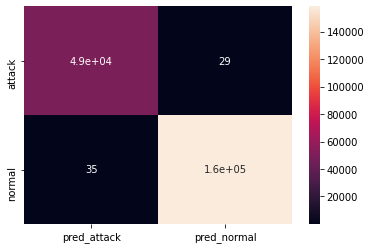

In [32]:
import seaborn as sns
sns.heatmap(confusion, annot = True)
plt.show()

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49527
           1       1.00      1.00      1.00    158335

    accuracy                           1.00    207862
   macro avg       1.00      1.00      1.00    207862
weighted avg       1.00      1.00      1.00    207862

